<a href="https://colab.research.google.com/github/janilitsa/gitdagray/blob/main/FFN_project2_139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from IPython import display
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [30]:
#import the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']

data = data.replace('?',np.nan).dropna()

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [31]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


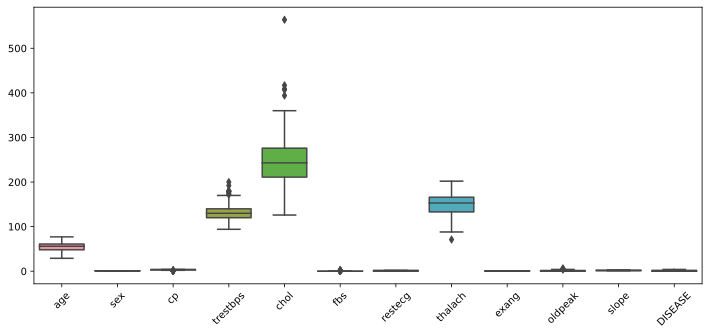

In [32]:
from IPython.core.pylabtools import figsize
fig,ax = plt.subplots(1,figsize=(12,5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [33]:
# normalize columns except  'sex','fbs','exang','DISEASE'
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex','fbs','exang','DISEASE'])
#cols2zscore
for c in cols2zscore:
  d = pd.to_numeric(data[c])
  data[c] = (d - d.mean())/d.std(ddof=1)


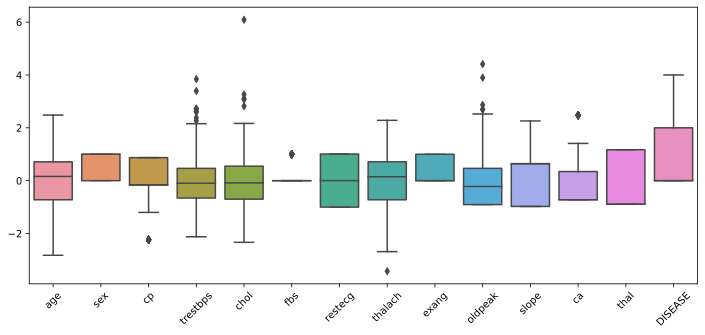

In [34]:
fig,ax = plt.subplots(1,figsize=(12,5))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [35]:
data['DISEASE'].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: DISEASE, dtype: int64

In [36]:
# re-code events to 0 (absent) and 1 (present)
data['DISEASE'][data['DISEASE']>0] = 1
data['DISEASE'].value_counts()

<ipython-input-36-4c05bf671489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE']>0] = 1


0    160
1    137
Name: DISEASE, dtype: int64

In [37]:
dataT = torch.tensor(data[data.keys().drop('DISEASE')].values).float()
labels = torch.tensor(data['DISEASE'].values).float()

print(dataT.shape)
print(labels.shape)

labels = labels[:,None]
print(labels.shape)


torch.Size([297, 13])
torch.Size([297])
torch.Size([297, 1])


In [38]:
train_data,test_data, train_labels, test_labels = train_test_split(dataT,labels,test_size=50)

train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

batchsize = 20
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [39]:
for X,y in train_loader:
  print(X.shape, y.shape)

torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])
torch.Size([20, 13]) torch.Size([20, 1])


In [40]:
class theNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(13,32) # input layer
    self.fc1 = nn.Linear(32,64) # hidden layer
    self.fc2 = nn.Linear(64,10) # hidden layer
    self.output = nn.Linear(10,1)  # output layer                           )

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.output(x)

In [41]:
net = theNet()
X,y = next(iter(train_loader))
yHat = net(X)
print(yHat)

lossfun = nn.BCEWithLogitsLoss() # loss function
lossfun(yHat,y)

tensor([[0.1676],
        [0.1502],
        [0.1508],
        [0.1623],
        [0.1619],
        [0.1705],
        [0.1724],
        [0.1572],
        [0.1457],
        [0.1613],
        [0.1551],
        [0.1582],
        [0.1533],
        [0.1837],
        [0.1752],
        [0.1579],
        [0.1684],
        [0.1654],
        [0.1531],
        [0.1389]], grad_fn=<AddmmBackward0>)


tensor(0.7149, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [48]:
net = theNet()
optimizer = torch.optim.Adam(net.parameters(),lr=.0001)
lossfun = nn.BCEWithLogitsLoss()

numepochs = 100

trainLoss = torch.zeros(numepochs)
testLoss  = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc   = torch.zeros(numepochs)

for epochi in range(numepochs):
  batchLoss = []  # loop over training data batches
  for X,y in train_loader:
    #forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batchLoss.append(loss.item())  # loss from this batch

    #train accuracy
    predictions = (torch.sigmoid(yHat)>.5).float()
    trainAcc[epochi] = 100*torch.mean((predictions==y).float())
  # end of batch loop
  trainLoss[epochi] = np.mean(batchLoss)

  X,y = next(iter(test_loader))
  yHat = net(X)

  loss = lossfun(yHat,y) # test loss
  testLoss[epochi] = loss.item()

  predictions = (torch.sigmoid(yHat)>.5).float()
  testAcc[epochi] = 100*torch.mean((predictions==y).float())



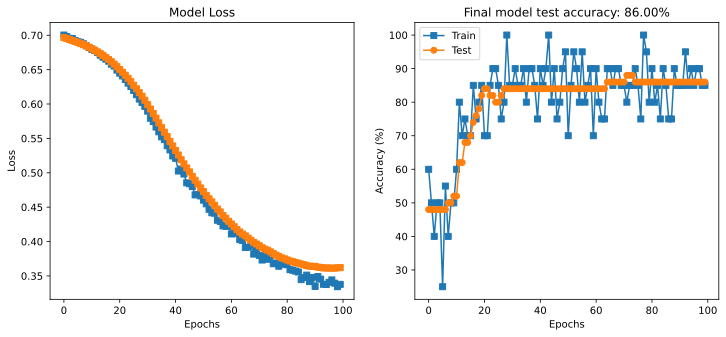

In [49]:
fig,ax = plt.subplots(1,2,figsize= (12,5))
ax[0].plot(trainLoss,'s-',label='Train')
ax[0].plot(testLoss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc,'s-',label='Train')
ax[1].plot(testAcc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()